In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Cell 2: Create sample patient data
np.random.seed(42)  # for reproducibility

# Generate synthetic dataset with 200 rows
n = 200
data = pd.DataFrame({
    'age': np.random.randint(20, 90, size=n),
    'gender': np.random.choice(['Male', 'Female'], size=n),
    'past_admissions': np.random.poisson(lam=2, size=n),
    'days_in_hospital': np.random.randint(1, 15, size=n),
    'chronic_conditions': np.random.randint(0, 5, size=n),
    'follow_up_received': np.random.choice([0, 1], size=n, p=[0.3, 0.7]),
    'readmitted': np.random.choice([0, 1], size=n, p=[0.75, 0.25])  # 1 = readmitted, 0 = not
})

data.head()


,age,gender,past_admissions,days_in_hospital,chronic_conditions,follow_up_received,readmitted
0,71,Male,3,14,0,0,1
1,34,Female,2,11,3,1,0
2,80,Male,3,4,2,1,0
3,40,Female,2,4,4,0,0
4,43,Female,1,5,0,1,1


In [3]:
# Cell 3: Preprocess the data

# Encode 'gender' as numeric
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

# Separate features and target
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Scale the features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, random_state=42)  # 0.176 of 85% ≈ 15%

# Display the shapes to confirm
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


Train set: (140, 6)
Validation set: (30, 6)
Test set: (30, 6)


In [4]:
# Cell 4: Train logistic regression and evaluate on validation set

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Evaluate performance
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_cm = confusion_matrix(y_val, y_val_pred)

# Display results
print("Validation Accuracy:", round(val_accuracy, 2))
print("Validation Precision:", round(val_precision, 2))
print("Validation Recall:", round(val_recall, 2))
print("\nConfusion Matrix:\n", val_cm)


Validation Accuracy: 0.8
Validation Precision: 0.0
Validation Recall: 0.0

Confusion Matrix:
 [[24  0]
 [ 6  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
# Cell 5: Evaluate model on the test set

# Predict on test set
y_test_pred = model.predict(X_test)

# Evaluate
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Show results
print("Test Accuracy:", round(test_accuracy, 2))
print("Test Precision:", round(test_precision, 2))
print("Test Recall:", round(test_recall, 2))
print("\nConfusion Matrix:\n", test_cm)


Test Accuracy: 0.77
Test Precision: 0.0
Test Recall: 0.0

Confusion Matrix:
 [[23  0]
 [ 7  0]]


In [6]:
# Cell 6: Re-train logistic regression with class weights

# Initialize the model with class weights to handle imbalance
weighted_model = LogisticRegression(class_weight='balanced')
weighted_model.fit(X_train, y_train)

# Predict on test set
y_test_pred_weighted = weighted_model.predict(X_test)

# Evaluate
weighted_accuracy = accuracy_score(y_test, y_test_pred_weighted)
weighted_precision = precision_score(y_test, y_test_pred_weighted)
weighted_recall = recall_score(y_test, y_test_pred_weighted)
weighted_cm = confusion_matrix(y_test, y_test_pred_weighted)

# Show results
print("Weighted Test Accuracy:", round(weighted_accuracy, 2))
print("Weighted Test Precision:", round(weighted_precision, 2))
print("Weighted Test Recall:", round(weighted_recall, 2))
print("\nConfusion Matrix:\n", weighted_cm)


Weighted Test Accuracy: 0.6
Weighted Test Precision: 0.33
Weighted Test Recall: 0.71

Confusion Matrix:
 [[13 10]
 [ 2  5]]


/tmp/ipython-input-7-1964859709.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette='viridis')


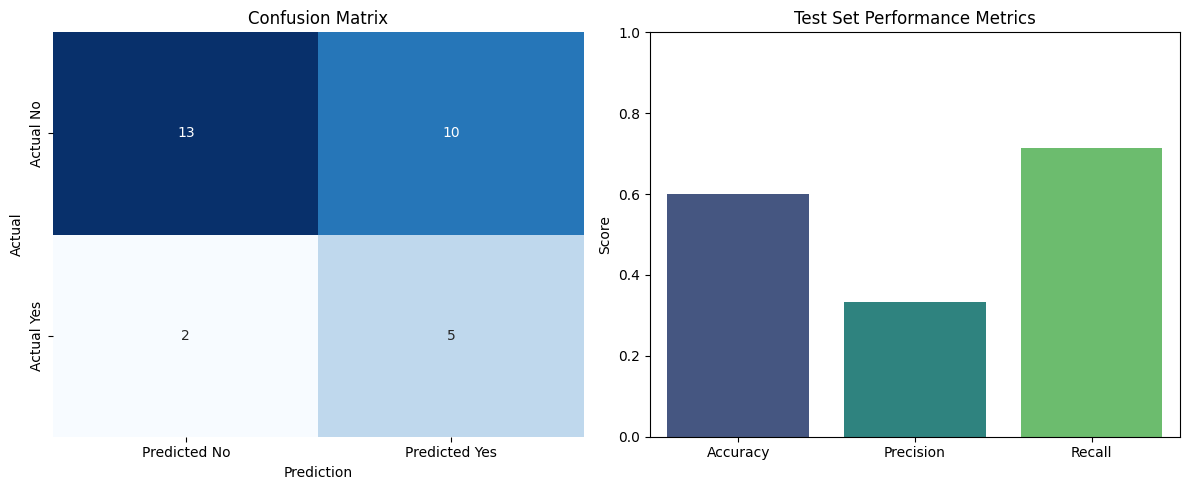

In [7]:
# Cell 7: Plot confusion matrix and bar chart of metrics

# Set up confusion matrix plot
plt.figure(figsize=(12, 5))

# Plot confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(weighted_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')

# Plot bar chart of precision, recall, accuracy
plt.subplot(1, 2, 2)
scores = {
    'Accuracy': weighted_accuracy,
    'Precision': weighted_precision,
    'Recall': weighted_recall
}
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette='viridis')
plt.ylim(0, 1)
plt.title('Test Set Performance Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()
